# Курсовая работа

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы. 

Оценка финальной модели (той, которую вы выберете в качестве решения) будет по ROC-AUC (тестирование на части данных, которые мы оставили себе для проверки), поэтому при подгонке параметров можете, в том числе, ориентироваться на нее.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/drive/folders/15Js7gbMibmRqnsuk3U5JiolAyw56xuSh?usp=sharing) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import (GridSearchCV, 
                                     train_test_split,
                                     StratifiedKFold, 
                                     cross_val_score)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, f1_score, recall_score
from sklearn.metrics import roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('telecom_users.csv')
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [3]:
df.iloc[:, 9:13].head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection
0,No,No internet service,No internet service,No internet service
1,Fiber optic,No,Yes,Yes
2,Fiber optic,No,No,No
3,DSL,No,No,No
4,DSL,Yes,No,Yes


In [4]:
# поверхностное исследование
print('У нас %s строк и %s колонки.'%df.shape)
print('--------')
print(df.info())
print('--------')
print(df.isnull().sum())

У нас 5986 строк и 22 колонки.
--------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
Unnamed: 0          5986 non-null int64
customerID          5986 non-null object
gender              5986 non-null object
SeniorCitizen       5986 non-null int64
Partner             5986 non-null object
Dependents          5986 non-null object
tenure              5986 non-null int64
PhoneService        5986 non-null object
MultipleLines       5986 non-null object
InternetService     5986 non-null object
OnlineSecurity      5986 non-null object
OnlineBackup        5986 non-null object
DeviceProtection    5986 non-null object
TechSupport         5986 non-null object
StreamingTV         5986 non-null object
StreamingMovies     5986 non-null object
Contract            5986 non-null object
PaperlessBilling    5986 non-null object
PaymentMethod       5986 non-null object
MonthlyCharges      5986 non-null float64
TotalCharges        5986 non-null o

In [5]:
# посмотрим на распределение по оттоку (гораздо больше тех, кто не ушел)
df['Churn'].value_counts()

No     4399
Yes    1587
Name: Churn, dtype: int64

In [6]:
# посмотрим на распределение остальных категориальных признаков
list_1_columns=df.columns.tolist()[2:6]
list_2_columns=df.columns.tolist()[7:19]

for col in list_1_columns:
    print(col)
    print(df[col].value_counts())
    print('----------')
    
for col in list_2_columns:
    print(col)
    print(df[col].value_counts())
    print('----------')

gender
Male      3050
Female    2936
Name: gender, dtype: int64
----------
SeniorCitizen
0    5020
1     966
Name: SeniorCitizen, dtype: int64
----------
Partner
No     3082
Yes    2904
Name: Partner, dtype: int64
----------
Dependents
No     4195
Yes    1791
Name: Dependents, dtype: int64
----------
PhoneService
Yes    5396
No      590
Name: PhoneService, dtype: int64
----------
MultipleLines
No                  2848
Yes                 2548
No phone service     590
Name: MultipleLines, dtype: int64
----------
InternetService
Fiber optic    2627
DSL            2068
No             1291
Name: InternetService, dtype: int64
----------
OnlineSecurity
No                     2982
Yes                    1713
No internet service    1291
Name: OnlineSecurity, dtype: int64
----------
OnlineBackup
No                     2605
Yes                    2090
No internet service    1291
Name: OnlineBackup, dtype: int64
----------
DeviceProtection
No                     2640
Yes                    2055
N

In [7]:
# признак 'tenure' также является категориальным (73 катег.)
df['tenure'].unique()

array([72, 44, 38,  4,  2, 70, 33,  1, 39, 55, 52, 30, 60, 50, 32, 51, 69,
       42, 14, 62,  5, 63, 67, 40, 65, 16, 46, 11, 49, 68, 10, 53, 54, 15,
        3, 71,  8, 64, 57, 20, 26, 31,  7, 35,  6, 13, 23,  9, 45, 17, 34,
       58, 12, 25, 28, 29, 43, 19, 41, 37, 27, 22, 24, 18, 56, 66, 59, 48,
       47, 61, 21,  0, 36], dtype=int64)

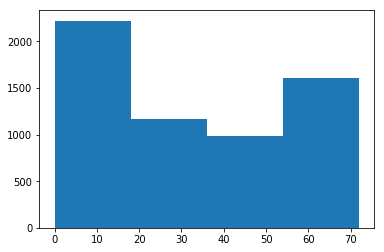

In [8]:
# разобъем 'tenure' на 4 'бина'
# в дальнейшем этот признак переведем в 4 категории
fig, subplot = plt.subplots()
subplot.hist(df['tenure'].values, bins=4, histtype='bar',
             align='mid', orientation='vertical');

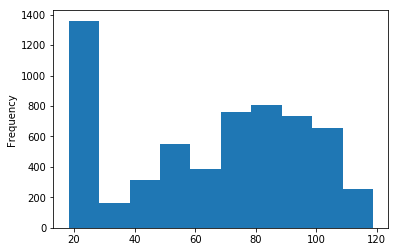

In [9]:
# к 'MonthlyCharges' применим классич. гистограмму
# гистограммы очень восприимчивы к экстремальным значениям!
df['MonthlyCharges'].plot.hist();

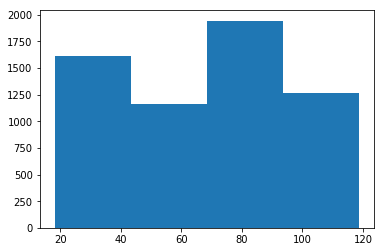

In [10]:
# также разобъем 'MonthlyCharges' на 4 'бина'
# в дальнейшем и этот признак переведем в 4 категории
fig, subplot = plt.subplots()
subplot.hist(df['MonthlyCharges'].values, bins=4, histtype='bar',
             align='mid', orientation='vertical');

In [11]:
# оказывается у нас имеются значения в колонке 'TotalCharges' равные ' ' 
df[df['TotalCharges'] == ' ']

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
634,1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
2771,3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
3086,5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
3255,3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
4326,936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
5375,753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
5382,4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5695,488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
5951,1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No


In [12]:
# обработаем эти значения 
# т.к. tenure = 0, то по TotalCharges выставим 0
df['TotalCharges'] = df['TotalCharges'].str.replace(' ', '0')
df['TotalCharges'] = df['TotalCharges'].astype(float)

# Далее создадим условия для более детального исследования!  

# удалим нулевой столбец 
df = df.drop(columns='Unnamed: 0')

# половой признак переведем в числа
df['gender'] = df['gender'].map({'Female': 0, 
                                 'Male': 1}).astype(int)

# список для колонок с 2-мя категориями: 'yes' или 'no'
list_yes_no = ['Partner', 'Dependents', 'PhoneService', 
               'PaperlessBilling', 'Churn']

# цикл 
for column in list_yes_no:
    df[column] = df[column].map({'No': 0, 
                                 'Yes': 1}).astype(int)

# признак телефонных линий в числа (3 категории!)
df['MultipleLines'] = df['MultipleLines'].map({'No': 0, 
                                               'Yes': 1, 
                                               'No phone service': 2}).astype(int)

# признак интернет провайдера в числа (3 категории!)
df['InternetService'] = df['InternetService'].map({'DSL': 0, 
                                                   'Fiber optic': 1, 
                                                   'No': 2}).astype(int)

# список для колонок с 3-мя категориями: 'yes', 'no' или 'no internet service'
list_3_categ = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                'TechSupport', 'StreamingTV', 'StreamingMovies']

# цикл 
for column in list_3_categ:
    df[column] = df[column].map({'No': 0, 'Yes': 1, 
                                 'No internet service': 2}).astype(int)

# признак контракта в числа (3 категории!)
df['Contract'] = df['Contract'].map({'Month-to-month': 0, 
                                     'One year': 1, 
                                     'Two year': 2}).astype(int)

# признак оплаты в числа (4 категории!)
df['PaymentMethod'] = df['PaymentMethod'].map({'Electronic check': 0, 
                                               'Mailed check': 1, 
                                               'Bank transfer (automatic)': 2, 
                                               'Credit card (automatic)': 3}).astype(int)

In [13]:
# взглянем на базовые статистики 
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000
mean,0.509522,0.161377,0.485132,0.299198,32.468760,0.901437,0.622787,0.870197,0.717508,0.780488,0.774641,0.721183,0.816572,0.822085,0.694621,0.589375,1.318744,64.802213,2294.221559,0.265119
std,0.499951,0.367909,0.499821,0.457945,24.516391,0.298100,0.657360,0.737824,0.796327,0.776381,0.778469,0.795314,0.762377,0.760064,0.832884,0.491988,1.150194,30.114702,2274.164124,0.441433
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.650000,401.587500,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,70.400000,1408.575000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,56.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.900000,3841.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


# 2. Исследование зависимостей и формулирование гипотез

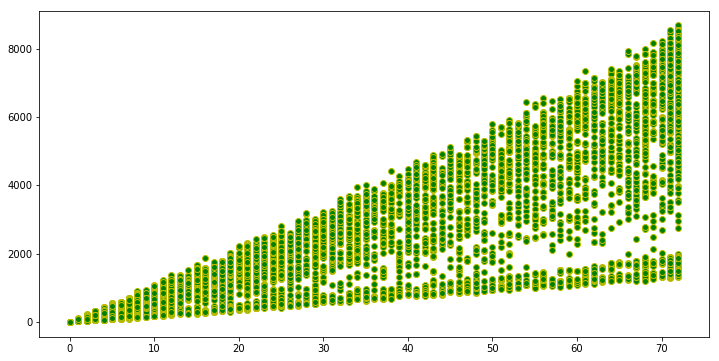

In [14]:
# предположим, что чем больше 'tenure', тем выше 'TotalCharges'
# взглянем на scatter plot
fig, subplot = plt.subplots(figsize = (12,6))
x_values = df['tenure'].values
y_values = df['TotalCharges'].values
subplot.scatter(x=x_values, y=y_values, 
                marker='o', c='g', edgecolor='y');

In [15]:
# И проверим корреляцию
corr_matrix = df.corr()
corr_matrix['TotalCharges'].sort_values(ascending=False)

TotalCharges        1.000000
tenure              0.827756
MonthlyCharges      0.656762
Contract            0.449090
Partner             0.321349
MultipleLines       0.251204
PaymentMethod       0.217647
PaperlessBilling    0.162804
PhoneService        0.117165
SeniorCitizen       0.093807
Dependents          0.062691
gender             -0.003664
StreamingMovies    -0.068907
StreamingTV        -0.076602
DeviceProtection   -0.079680
OnlineBackup       -0.088008
TechSupport        -0.140369
OnlineSecurity     -0.152307
InternetService    -0.173623
Churn              -0.196390
Name: TotalCharges, dtype: float64

In [16]:
# имеется сильная положительная корреляция между 'tenure' и 'TotalCharges' 
# во избежание избыточности признаков удалим TotalCharges 
df = df.drop(columns='TotalCharges')

In [17]:
# исходя из построенных ранее гистограмм, 
# переведем признак 'tenure' в 4 категории (биннинг)
df.loc[df['tenure'] <= 18, 'tenure'] = 0
df.loc[(df['tenure'] > 18) & (df['tenure'] <= 36), 'tenure'] = 1
df.loc[(df['tenure'] > 36) & (df['tenure'] <= 54), 'tenure'] = 2
df.loc[df['tenure'] > 54, 'tenure'] = 3

# исходя из построенных ранее гистограмм, 
# переведем признак 'MonthlyCharges' в 4 категории (биннинг)
df.loc[df['MonthlyCharges'] <= 42, 'MonthlyCharges'] = 0
df.loc[(df['MonthlyCharges'] > 42) & (df['MonthlyCharges'] <= 70), 'MonthlyCharges'] = 1
df.loc[(df['MonthlyCharges'] > 70) & (df['MonthlyCharges'] <= 95), 'MonthlyCharges'] = 2
df.loc[df['MonthlyCharges'] > 95, 'MonthlyCharges'] = 3
df['MonthlyCharges'] = df['MonthlyCharges'].astype(int)

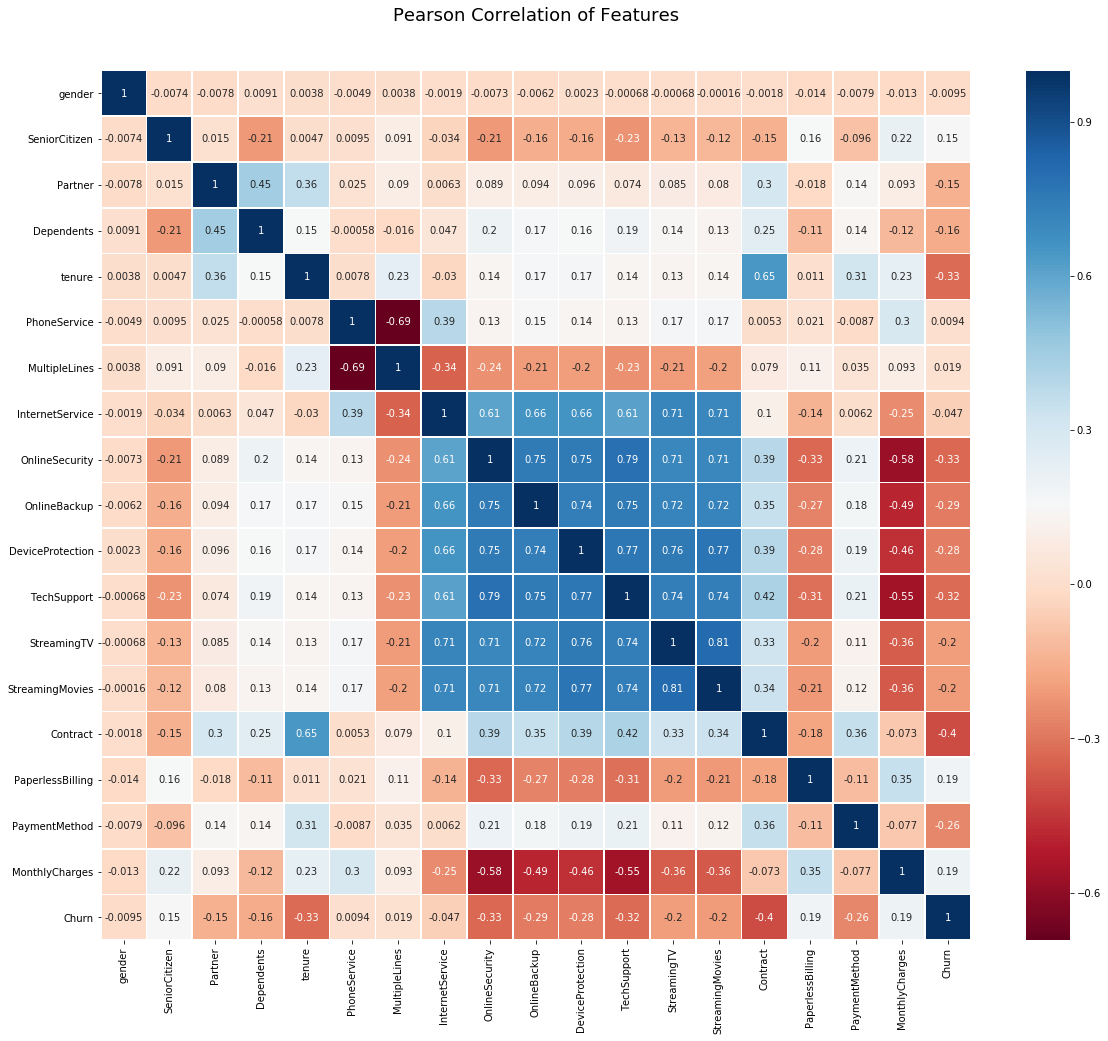

In [18]:
# другие взаимосвязи на тепловой карте Пирсона 
colormap = plt.cm.RdBu
plt.figure(figsize=(20,16))
plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(df.iloc[:, 1:].astype(float).corr(),linewidths=0.7,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True);

In [19]:
# наблюдается сильная корреляция между признаками: 
 # - StreamingTV и StreamingMovies; 
 # - PhoneService и MultipleLines; 
 # - OnlineSecurity и TechSupport; 
 # - OnlineSecurity и OnlineBackup; 
 # - OnlineSecurity и DeviceProtection; 
 # - OnlineBackup и TechSupport; 
 # - OnlineBackup и DeviceProtection; 
 # - DeviceProtection и TechSupport 

# во избежание избыточности признаков удалим 6 признаков:
 # - PhoneService (оставим MultipleLines с большим колич-м катег-й) 
 # - StreamingMovies (чуть выше корреляция с DeviceProtection чем у StreamingTV) 
 # - TechSupport (чуть выше корреляция с OnlineSecurity чем у OnlineBackup) 
 # - DeviceProtection (чуть выше корреляция со StreamingTV чем у OnlineBackup)
 # - OnlineBackup (высокая корреляция с OnlineSecurity)
 # - StreamingTV (высокая корреляция с InternetService и OnlineSecurity)

# на всякий случай сделаем копию датафрейма 
df_main = df.copy()
drop_elements = ['PhoneService', 'StreamingMovies', 'StreamingTV', 
                 'TechSupport', 'DeviceProtection', 'OnlineBackup']
df_main = df_main.drop(drop_elements, axis=1)

In [20]:
# И еще удалим 3 признака, у которых: 
# - очень слабые "связи", и они могут испортить наши модели, внеся шум.
# SeniorCitizen, Partner, Dependents 
drop_elements2 = ['SeniorCitizen', 'Partner', 'Dependents']
df_main = df_main.drop(drop_elements2, axis=1)

# 3. Построение моделей для прогнозирования оттока

In [21]:
df_main.head()

,customerID,gender,tenure,MultipleLines,InternetService,OnlineSecurity,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,7010-BRBUU,1,3,1,2,2,2,0,3,0,0
1,9688-YGXVR,0,2,0,1,0,0,1,3,2,0
2,9286-DOJGF,0,2,1,1,0,0,1,2,2,1
3,6994-KERXL,1,0,0,0,0,0,1,0,1,0
4,2181-UAESM,1,0,0,0,1,0,0,0,1,0


In [22]:
X = df_main.drop(['customerID','Churn'], axis=1)
y = df_main.Churn

In [31]:
# Т.к. мы снизили степень зависимости между признаками датасета, 
# то в качестве модели прогнозирования можем рассмотреть: 
#  - GaussianNB, который хорошо себя показывает на независимых признаках
#  - LogisticRegression, которая неплохо справляется с бинарной классификацией 
#  - GradientBoostingClassifier проверим (на всякий случай!) 
#  - XGBoost, т.к. он является весьма эффективным из современных методов

In [23]:
# Создадим функцию, которая для выбранных нами моделей:
# - выводит лучшие параметры grid_search
# - выводит основные метрики
# - выводит classification_report
# - выводит кривую roc_auc

def best_clf_model(our_model):
    print('best_params of grid_search = ' + str(our_model.best_params_))
    best_clf_model = our_model.best_estimator_ 
    y_pred_model = best_clf_model.predict(X_valid)
    accuracy_score_model = accuracy_score(y_valid, y_pred_model)
    print('accuracy_score = {:.3f}'.format(accuracy_score_model))
    recall_model = recall_score(y_valid, y_pred_model)
    print('recall = {:.3f}'.format(recall_model))
    precision_model = precision_score(y_valid, y_pred_model)
    print('precision = {:.3f}'.format(precision_model))
    f1_score_model = f1_score(y_valid, y_pred_model)
    print('f1_score = {:.3f}'.format(f1_score_model))
    print('Classification_report:')
    print(classification_report(y_valid, y_pred_model, labels=[0, 1]))
    pred_prob = best_clf_model.predict_proba(X_valid)
    fpr, tpr, _ = roc_curve(y_valid, pred_prob[:, 1])
    auc = roc_auc_score(y_valid, pred_prob[:, 1])
    plt.plot(fpr, tpr, label="auc=" + str(auc))
    plt.title('Receiver Operating Characteristic curve')
    plt.legend(loc=4);

In [24]:
# 1) Проверим для начала модель GaussianNB 
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=17)
skf = StratifiedKFold(n_splits=5, random_state=17)

nb = GaussianNB()
parametrs_nb = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 
                                  1e-5, 1e-4, 1e-3, 1e-2]}
grid_search_NB = GridSearchCV(nb, parametrs_nb, cv=skf)
grid_search_NB.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=False),
       error_score='raise-deprecating',
       estimator=GaussianNB(priors=None, var_smoothing=1e-09),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

best_params of grid_search = {'var_smoothing': 1e-09}
accuracy_score = 0.739
recall = 0.746
precision = 0.502
f1_score = 0.600
Classification_report:
              precision    recall  f1-score   support

           0       0.89      0.74      0.81       883
           1       0.50      0.75      0.60       315

   micro avg       0.74      0.74      0.74      1198
   macro avg       0.70      0.74      0.70      1198
weighted avg       0.79      0.74      0.75      1198



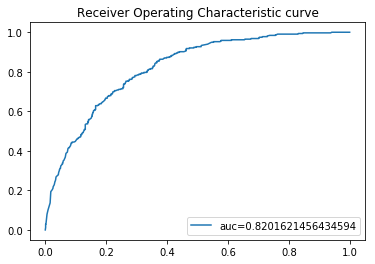

In [25]:
# Метрики Модели GaussianNB
best_clf_model(grid_search_NB)

In [21]:
# 2) Далее проверим модель LogisticRegression 
lr = LogisticRegression(random_state=17)
parametrs_lr = {'penalty': ['l2', 'l1'], 
                'tol': [1e-5, 1e-4, 1e-3, 1e-2], 
                'C': np.arange(0.1, 5, 0.1), 
                'solver': ['liblinear'], 
                'max_iter': np.arange(100, 150, 10), 
                'multi_class': ['auto', 'ovr']}
grid_search_LR = GridSearchCV(lr, parametrs_lr, cv=skf)
grid_search_LR.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=False),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=17, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l2', 'l1'], 'tol': [1e-05, 0.0001, 0.001, 0.01], 'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]), 'solver': ['liblinear'], 'max_iter': array([100, 110, 120, 130, 140]), 'multi_class': ['auto', 'ovr']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=Non

best_params of grid_search = {'C': 0.2, 'max_iter': 100, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.01}
accuracy_score = 0.797
recall = 0.514
precision = 0.643
f1_score = 0.571
Classification_report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       883
           1       0.64      0.51      0.57       315

   micro avg       0.80      0.80      0.80      1198
   macro avg       0.74      0.71      0.72      1198
weighted avg       0.79      0.80      0.79      1198



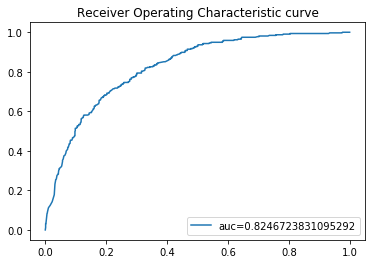

In [22]:
# Метрики Модели LogisticRegression
best_clf_model(grid_search_LR)

In [19]:
# 3) GradientBoostingClassifier 
gbc = GradientBoostingClassifier(random_state=17)
parametrs_gbc = {'learning_rate': np.arange(0.01, 0.6, 0.01)}
grid_search_GBC = GridSearchCV(gbc, parametrs_gbc, cv=skf)
grid_search_GBC.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=False),
       error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.

best_params of grid_search = {'learning_rate': 0.05}
accuracy_score = 0.795
recall = 0.483
precision = 0.650
f1_score = 0.554
Classification_report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       883
           1       0.65      0.48      0.55       315

   micro avg       0.80      0.80      0.80      1198
   macro avg       0.74      0.69      0.71      1198
weighted avg       0.78      0.80      0.78      1198



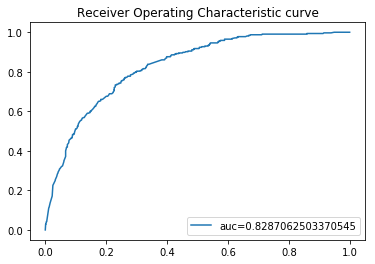

In [20]:
# Метрики Модели GradientBoostingClassifier
best_clf_model(grid_search_GBC)

In [27]:
# 4) Теперь проверим модель Xgboost (оболочка sklearn)
params_xgb={
    'n_estimators':20,
    'objective': 'binary:logistic',
    'learning_rate': 0.01,
    'gamma':0.9,
    'subsample':0.6,
    'colsample_bytree':0.6,
    'min_child_weight':3,
    'max_depth':4, 
    'reg_alpha':0.05, 
    'seed':1024,
    }

clf_xgb = XGBClassifier(**params_xgb, random_state=17)
clf_xgb.fit(X_train, y_train, \
        eval_set=[(X_train, y_train), (X_valid, y_valid)], \
                  eval_metric='auc', early_stopping_rounds = 50)

[0]	validation_0-auc:0.799038	validation_1-auc:0.800212
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.811916	validation_1-auc:0.814949
[2]	validation_0-auc:0.830768	validation_1-auc:0.828029
[3]	validation_0-auc:0.83094	validation_1-auc:0.828825
[4]	validation_0-auc:0.835698	validation_1-auc:0.82828
[5]	validation_0-auc:0.835087	validation_1-auc:0.829751
[6]	validation_0-auc:0.836869	validation_1-auc:0.829866
[7]	validation_0-auc:0.838262	validation_1-auc:0.830691
[8]	validation_0-auc:0.840189	validation_1-auc:0.829494
[9]	validation_0-auc:0.839316	validation_1-auc:0.830169
[10]	validation_0-auc:0.837401	validation_1-auc:0.831563
[11]	validation_0-auc:0.837128	validation_1-auc:0.83194
[12]	validation_0-auc:0.835576	validation_1-auc:0.831041
[13]	validation_0-auc:0.837065	validation_1-auc:0.831146
[14]	validation_0-auc:0.837206	validation_1-auc:0.829947
[

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.6, gamma=0.9,
       learning_rate=0.01, max_delta_step=0, max_depth=4,
       min_child_weight=3, missing=None, n_estimators=20, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=17,
       reg_alpha=0.05, reg_lambda=1, scale_pos_weight=1, seed=1024,
       silent=None, subsample=0.6, verbosity=1)

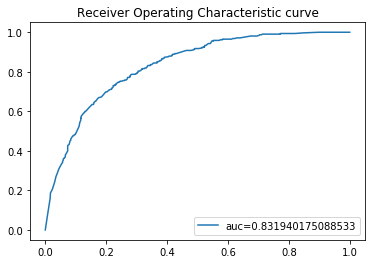

In [28]:
pred_prob = clf_xgb.predict_proba(X_valid)
fpr, tpr, _ = roc_curve(y_valid, pred_prob[:, 1])
auc = roc_auc_score(y_valid, pred_prob[:, 1])
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.title('Receiver Operating Characteristic curve')
plt.legend(loc=4);

In [29]:
# Метрики Модели Xgboost 
y_pred_xgb = clf_xgb.predict(X_valid)
accuracy_score_xgb = accuracy_score(y_valid, y_pred_xgb)
print('accuracy_score = {:.3f}'.format(accuracy_score_xgb))
recall_xgb = recall_score(y_valid, y_pred_xgb)
print('recall = {:.3f}'.format(recall_xgb))
precision_xgb = precision_score(y_valid, y_pred_xgb)
print('precision = {:.3f}'.format(precision_xgb))
f1_score_xgb = f1_score(y_valid, y_pred_xgb)
print('f1_score = {:.3f}'.format(f1_score_xgb))

accuracy_score = 0.787
recall = 0.375
precision = 0.670
f1_score = 0.481


In [43]:
# 5) Xgboost (из коробки)

dtrain = xgb.DMatrix(X_train, y_train)
dvalid = xgb.DMatrix(X_valid)
params = {'objective': 'binary:logistic', 
          'booster':'gbtree', 
          'eval_metric':'error', 
          'max_depth': 5, 
          'min_child_weight': 30, 
          'silent': 1, 
          'eta': 0.01}

num_rounds = 50
# обучаем модель 
xgb_model = xgb.train(params, dtrain, num_boost_round = num_rounds)
# предсказания для валидационных данных
dpred_xgb = xgb_model.predict(dvalid)
dpred_xgb = dpred_xgb > 0.5
# точность 
d_prec = precision_score(y_valid, dpred_xgb)
print('precision = {:.3f}'.format(d_prec))
# полнота 
d_rec = recall_score(y_valid, dpred_xgb)
print('recall = {:.3f}'.format(d_rec))

precision = 0.621
recall = 0.514


In [44]:
# модель плохо распознает объекты класса, представленного меньшим количеством
# зададим вручную веса для экземпляров классов на train-выборке
weights = np.zeros(len(y_train))
weights[y_train == 0] = 1
weights[y_train == 1] = 6
dtrain = xgb.DMatrix(X_train, y_train, weight=weights)
dvalid = xgb.DMatrix(X_valid)
xgb_model = xgb.train(params, dtrain, num_boost_round = num_rounds)
dpred_xgb_weight = xgb_model.predict(dvalid)
dpred_xgb_weight = dpred_xgb_weight > 0.5
d_prec_weight = precision_score(y_valid, dpred_xgb_weight)
print('precision = {:.3f}'.format(d_prec_weight))
d_rec_weight = recall_score(y_valid, dpred_xgb_weight)
print('recall = {:.3f}'.format(d_rec_weight))

precision = 0.416
recall = 0.911


# 4. Сравнение качества моделей 

Самым высоким показателем roc-auc среди всех моделей обладает Xgboost (оболочка sklearn). 

Самым высоким показателем recall среди всех моделей обладает Xgboost (из коробки с ручной настройкой весов для экземпляров классов на train-выборке). 

Самым высоким показателем precision среди всех моделей обладает Xgboost (оболочка sklearn). 